# Simulations for for heated pipe: Tritical DP (without space)

### Summary

-  To simulate our mean field dynamics in a homogenous case, we use the equations 


$$
\partial_t \rho = - \dfrac{\partial V_{p,q}( \rho)}{\rho};\quad
    V_{p,q}(\rho) = -\tau_{p,q} \frac{\rho^2}{2} +g_{p,q}\dfrac{\rho^3}{3} + c_{p,q} \dfrac{\rho^4}{4}$$


- To get the outplot .txt files with value of $\rho(p,q,t)$ we use the .c file titled "tricritical_DP_no_space.c". This python script generates the plots using the output of .txt files. The zip compressed .txt files can be found on the github repo (note: the names of the files have "qweu" representing q) 


- To generate the plots we first set $q=0.6> q_C=1/3$ and $q=0.1<q_C$ to compare the discontinuous and continuous regime respectively. 

- We use $T=200$ numerical time to generate these plots. We non-dimensionalize this in terms an time scale generated from linearized dynamics near $\rho(p=1,q=0.6)$. See the last cell in this script. 

In [43]:
import matplotlib.pyplot as plt
import numpy as np
# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True

In [39]:
def rho(p,q):
    tau  = 2*p-1
    g = p - (2-p)*q
    c = q
    rho = -(g/(2*c)) + np.sqrt(g**2 + 4*tau*c)/(2*c)
    return rho

In [40]:
# Load data from the output.txt file
data1 = np.loadtxt('tricritical_DP_qweu_0.6_DT_0.001_NT200000_T_200.txt')
data2 = np.loadtxt('tricritical_DP_qweu_0.1_DT_0.001_NT200000_T_200.txt')

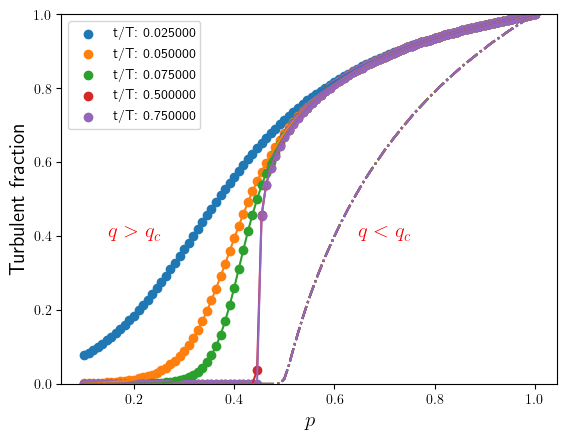

In [41]:
tpoints= np.concatenate((np.arange(5000,20000,5000),np.arange(100000,200000,50000)))
for t in tpoints:
    plt.plot(np.linspace(0.1,1,num=100),data1[t])
    plt.scatter(np.linspace(0.1,1,num=100),data1[t],label='t/T: %f'%(t/(200000)))
plt.ylim(0,1)


tpoints2= np.arange(190000,200000,1000)
for t in tpoints2:
    plt.plot(np.linspace(0.1,1,num=100),data2[t,:],'-.')
    #plt.scatter(np.linspace(0.1,1,num=100),data5[t,:])

    
plt.text(0.7, 0.4, r'$q<q_c$', fontsize=15, color='red', ha='center')
plt.text(0.2, 0.4, r'$q>q_c$', fontsize=15, color='red', ha='center')

plt.ylabel('Turbulent fraction',size=15)
plt.xlabel('$p$',size=15)
plt.legend()
plt.savefig('qweu_0.6_t_200000_dt_0.001.png')

### Non-dimensionalized time

- Linearizing the dynamics near $\rho(p=1,q=0.6)=1$, we report the time used in simulations i.e. $T=200$ in terms of the exponential time scale associated with the linear dynamics near $\rho=1$. The result is $T/t_{eq}\sim 320$, which is value indicated in the paper (see figure below the plot). 

In [42]:

def time(p,q):
    tau  = 2*p-1
    g = p - (2-p)*q
    c = q
    time = 1/(3*c*rho(p,q)**2+2*g*rho(p,q) - tau)
    return time


print(200/time(1,0.6))

319.99999999999994
